In [118]:
import numpy as np
from sklearn.linear_model import LinearRegression, ARDRegression, BayesianRidge
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

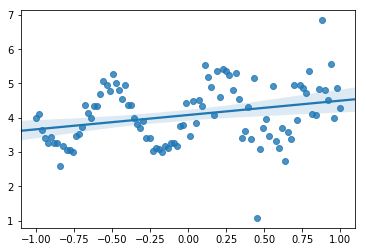

In [134]:
x = np.linspace(-1, 1, 100)
y = np.sin(np.pi*3*x) + 4 #+ np.random.normal(0, 3, size=100)
y[:50] = y[:50] + np.random.normal(0, 0.2, size=50)
y[50:] = y[50:] + np.random.normal(0, 0.8, size=50)
sn.regplot(x=x, y=y)

In [169]:
x = np.reshape(x, (-1, 1))
degree = 3
model = make_pipeline(PolynomialFeatures(degree), BayesianRidge())
model.fit(x[-70:], y[-70:])

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('bayesianridge',
                 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                               compute_score=False, copy_X=True,
                               fit_intercept=True, lambda_1=1e-06,
                               lambda_2=1e-06, n_iter=300, normalize=False,
                               tol=0.001, verbose=False))],
         verbose=False)

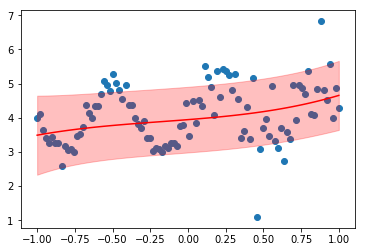

In [170]:
y_pred, sigma = model.predict(x, return_std=True)
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.fill_between(np.reshape(x, -1), y_pred - sigma, y_pred + sigma, alpha=0.25, color='r')

In [165]:
cv = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
print(cv.mean(), cv.std())
sigma.mean()

-0.7745827679799944 0.06889323373425221


0.9427806372026223

In [157]:
y1 = gp.predict(np.reshape(x[0], (-1,1)) )
y2 = gp.predict(np.reshape(x[-1], (-1,1)) )
sigma

array([1.10333084, 1.10232196, 1.10133278, 1.10036334, 1.0994137 ,
       1.09848391, 1.09757403, 1.09668409, 1.09581415, 1.09496426,
       1.09413446, 1.09332479, 1.09253532, 1.09176607, 1.09101708,
       1.09028842, 1.0895801 , 1.08889217, 1.08822468, 1.08757766,
       1.08695114, 1.08634516, 1.08575975, 1.08519496, 1.0846508 ,
       1.08412731, 1.08362453, 1.08314248, 1.08268118, 1.08224067,
       1.08182097, 1.08142211, 1.0810441 , 1.08068697, 1.08035074,
       1.08003543, 1.07974106, 1.07946764, 1.07921519, 1.07898373,
       1.07877326, 1.07858381, 1.07841538, 1.07826798, 1.07814163,
       1.07803632, 1.07795206, 1.07788887, 1.07784674, 1.07782567,
       1.07782567, 1.07784674, 1.07788887, 1.07795206, 1.07803632,
       1.07814163, 1.07826798, 1.07841538, 1.07858381, 1.07877326,
       1.07898373, 1.07921519, 1.07946764, 1.07974106, 1.08003543,
       1.08035074, 1.08068697, 1.0810441 , 1.08142211, 1.08182097,
       1.08224067, 1.08268118, 1.08314248, 1.08362453, 1.08412

In [75]:
(y2[0] - y1[0]) / (x[-1][0] - x[0][0] )

2.912262606507329